## EDA
#### World Population 1970-2022

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading and Reading Data
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df = pd.read_csv("world_population.csv")
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.00,11655.00,12182.00,13142.00,14723.00,13454.00,11315.00,9377.00,142.00,81.49,1.00,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.00,556048.00,491824.00,413296.00,270375.00,178529.00,116775.00,76371.00,266000.00,2.17,1.02,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.00,32284046.00,28516545.00,24743946.00,18628700.00,13375121.00,9204938.00,6843607.00,527968.00,63.82,1.02,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.00,18927715.00,NaN,13792086.00,9891136.00,7686401.00,5720438.00,4281671.00,752612.00,26.60,1.03,0.25


In [3]:
# General Information about Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

- It is clear that some columns in data contain NaN values.

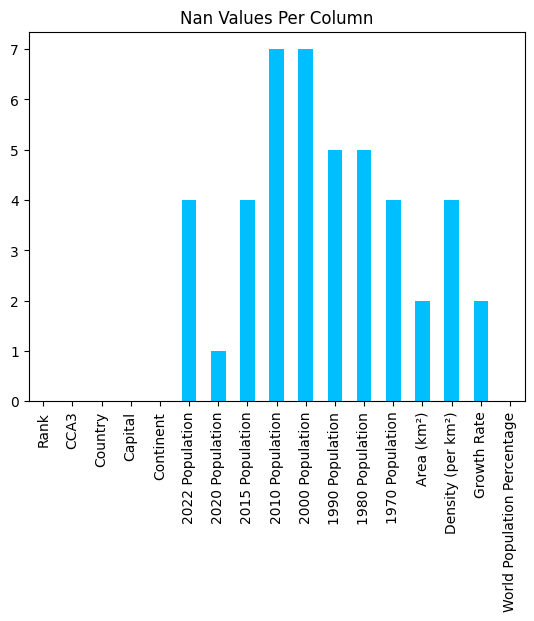

In [4]:
# Checking NaN Values Per Column
df.isnull().sum().plot(kind='bar', title="Nan Values Per Column", color="deepskyblue")
plt.show()

In [5]:
# Checking NaN Values in Rows
nan_per_country = pd.DataFrame({"Country":df[df.isna().any(axis=1)]["Country"], "Total_NaN":"", "Column with NaN":""})

for idx, country in zip(nan_per_country.index, nan_per_country["Country"]):
    nan_per_country.loc[idx] = [country, df.loc[df.index == idx].isna().sum(1).values[0],
                                [k for k, v in df.loc[df.index == idx].isna().sum().items() if v==1]]
    
nan_per_country

,Country,Total_NaN,Column with NaN
13,Azerbaijan,1,[2020 Population]
42,Colombia,1,[2010 Population]
59,Equatorial Guinea,1,[2015 Population]
62,Eswatini,1,[2022 Population]
72,Gambia,5,"[2010 Population, 2000 Population, 1990 Popula..."
73,Georgia,5,"[2010 Population, 2000 Population, 1990 Popula..."
90,Hungary,2,"[1990 Population, 1980 Population]"
91,Iceland,2,"[1990 Population, 1980 Population]"
92,India,2,"[1990 Population, 1980 Population]"
100,Ivory Coast,2,"[Density (per km²), Growth Rate]"


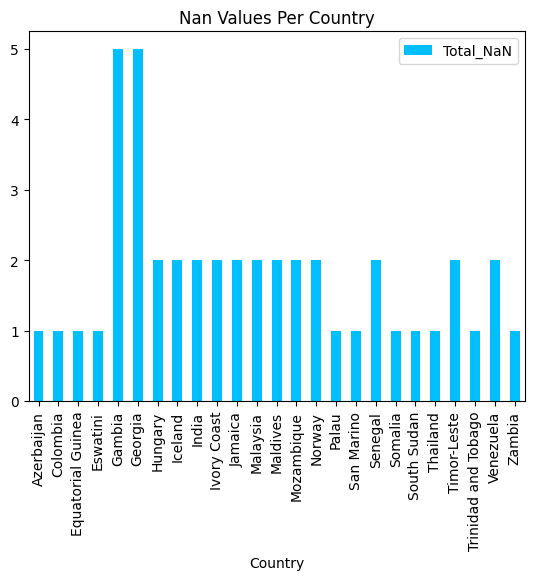

In [6]:
# NaN Values Per Country
nan_per_country.plot(kind='bar', x="Country", title="Nan Values Per Country", color="deepskyblue")
plt.show()

### Filling Missing Values. 
    Data are from "macrotrends.net".

| Country  |  |   |   |   |
| ----------- | ---------------------------- |---|---|---|
| Azerbaijan  | "2020 Population" = 10284951 |   |   |   |
| Colombia    | "2010 Population" = 44816108 |
| Equatorial_Guinea | "2015 Population" = 1346973 |
| Eswatini | "2022 Population" = 1201670 |
|Gambia |"2010 Population" = 1937275 | "2000 Population" = 1437539 | "1990 Population" = 1040616 | "1980 Population" = 718586 | "1970 Population" = 528731|
|Georgia|"2010 Population" = 9712209 |"2000 Population" = 8227303 | "1990 Population" = 6506531 | "1980 Population" = 5486174 |"1970 Population" = 4587930|
|Hungary |"1990 Population" = 10375989|"1980 Population" = 10698679|
|Iceland	|"1990 Population" = 255019|"1980 Population" = 228263|
|India |"1990 Population" = 870452165|"1980 Population" = 696828385|
|Ivory Coast |"Density (per km²)" = 89| "Growth Rate" = 2.48|
| Jamaica |"Density (per km²)" = 257.27| "Growth Rate" = 0.00|
|Malaysia |"2010 Population" = 28717731| "2000 Population" = 22945150|
|Maldives |"2010 Population" = 361575| "2000 Population" = 282507|
|Mozambique |"2015 Population" = 26843246| "2010 Population" = 23073723|
| Norway |"2022 Population" = 5434319| "2015 Population" = 5190356|
| Palau |"2022 Population" = 18055|
| San Marino |"2000 Population" = 26823|
| Senegal	|"Area (km²)" = 196722| "Density (per km²)" = 90|
| Somalia |"1970 Population" = 3720977|
| South_Sudan |"2010 Population" = 9714419|
| Thailand |"1970 Population" = 35791728|
| Timor - Leste	|"2022 Population" = 1341296| "2000 Population" = 878360|
| Trinidad and Tobago |"Density (per km²)" = 298.45|
| Venezuela |"2000 Population" = 24427729| "Area (km²)" = 916445|
| Zambia |"2015 Population" = 16248230|

In [7]:
# Entering NaN Values
missing_values = [{"2020 Population":10284951}, {"2010 Population":44816108},
                  {"2015 Population":1346973}, {"2022 Population":1201670},
                  {"2010 Population":1937275, "2000 Population":1437539, "1990 Population":1040616, "1980 Population":718586, "1970 Population":528731},
                  {"2010 Population":9712209, "2000 Population":8227303, "1990 Population":6506531, "1980 Population":5486174, "1970 Population":4587930}, {"1990 Population":10375989, "1980 Population":10698679},
                  {"1990 Population":255019, "1980 Population":228263}, {"1990 Population":870452165, "1980 Population":696828385},
                  {"Density (per km²)":89, "Growth Rate":2.48}, {"Density (per km²)":257.27, "Growth Rate":0.00},
                  {"2010 Population":28717731, "2000 Population":22945150},
                  {"2010 Population":361575, "2000 Population":282507}, {"2015 Population":26843246, "2010 Population":23073723},
                  {"2022 Population":5434319, "2015 Population":5190356}, {"2022 Population":18055},
                  {"2000 Population":26823}, {"Area (km²)":196722, "Density (per km²)":90},
                  {"1970 Population":3720977},
                  {"2010 Population":9714419}, {"1970 Population":35791728},
                  {"2022 Population":1341296, "2000 Population":878360}, {"Density (per km²)":298.45},
                  {"2000 Population":24427729, "Area (km²)":916445}, {"2015 Population":16248230}]

nan_per_country["Missing Values"] = missing_values

# Filling NaN Values in DataFrame
for idx, dict in zip(nan_per_country.index, nan_per_country["Missing Values"]):
    for key, value in dict.items():
        df.loc[idx, key] = value

# Checking NaN Values
df.isna().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [8]:
# General Statistical Information about Numerical Values
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00
mean,117.50,34074414.71,33501070.95,31729956.24,29870343.49,26286401.00,22714985.30,18986071.38,15786000.71,581449.38,452.14,1.01,0.43
std,67.69,136766424.80,135589876.92,130404992.75,124213801.67,111695157.07,97831353.44,81784941.96,67795240.86,1761840.86,2066.12,0.12,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.00,0.00
25%,59.25,419738.50,415284.50,404676.00,393149.00,327242.00,264115.75,229614.25,155997.00,2650.00,38.42,1.00,0.01
50%,117.50,5559944.50,5493074.50,5307400.00,5079695.00,4405922.00,3825409.50,3141145.50,2604830.00,81199.50,95.35,1.01,0.07
75%,175.75,22476504.75,21447979.50,19730853.75,19159567.50,15762301.00,11869231.00,9826053.75,8817329.00,430425.75,238.93,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,2.48,17.88


- We can observe a general growth in the population over the years.

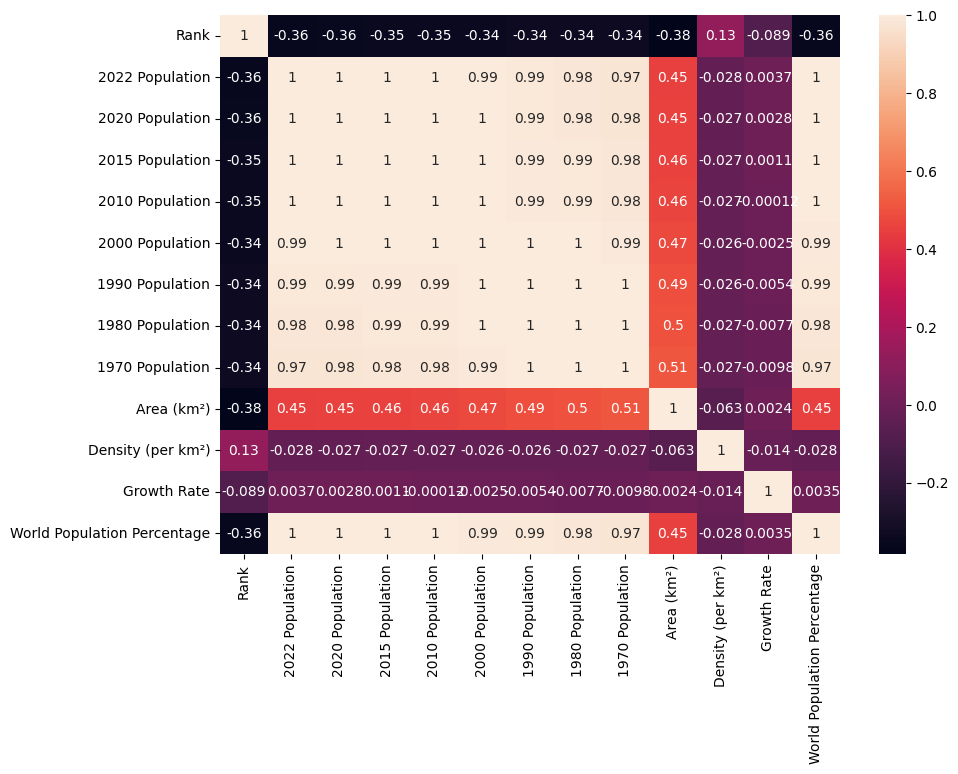

In [9]:
# Correlation
plt.rcParams["figure.figsize"] = (10,7)
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

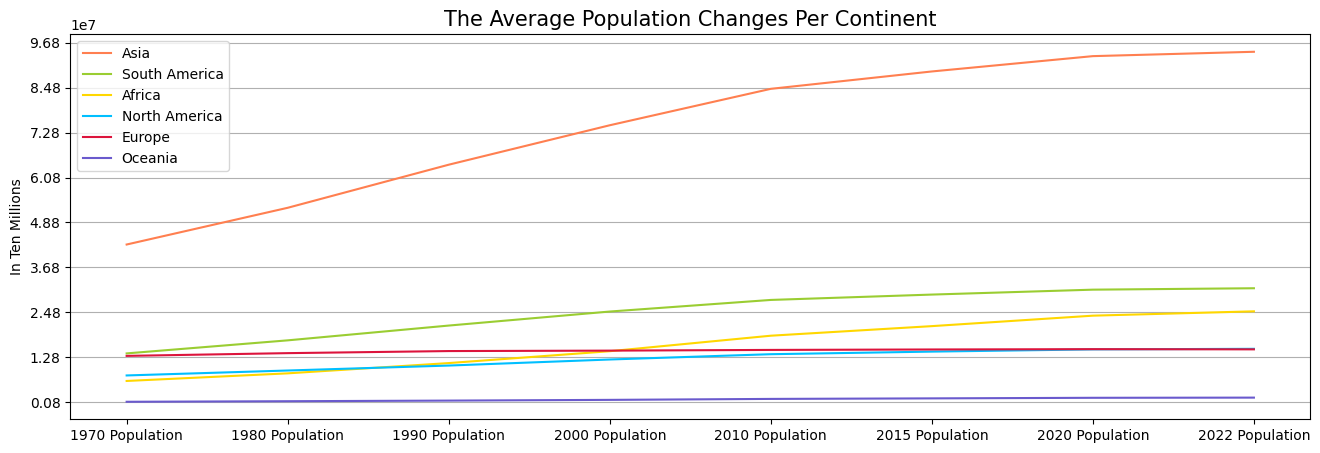

In [10]:
# The Average Population Changes Per Continent
grouped_df1 = df.groupby("Continent")[list(reversed(df.columns[5:13].to_list()))].mean(numeric_only=True).sort_values(by="2022 Population", ascending=False).transpose()

plt.figure(figsize=(16, 5))
lines = plt.plot(grouped_df1)
plt.title("The Average Population Changes Per Continent", fontsize=15)
plt.ylabel("In Ten Millions")
plt.yticks(np.arange(800000, 100000000, 12000000))
plt.grid(visible=True, axis="y")

l1, l2, l3, l4, l5, l6 = lines
colors = ['coral','yellowgreen','gold','deepskyblue','crimson','slateblue']
for line, color in zip(lines, colors):
    plt.setp(line, color=color)
plt.legend(grouped_df1.columns)

plt.show()

- Due to low population growth in Europe, South America and Africa noticeably overtook Europe in population growth by the end of 2022.

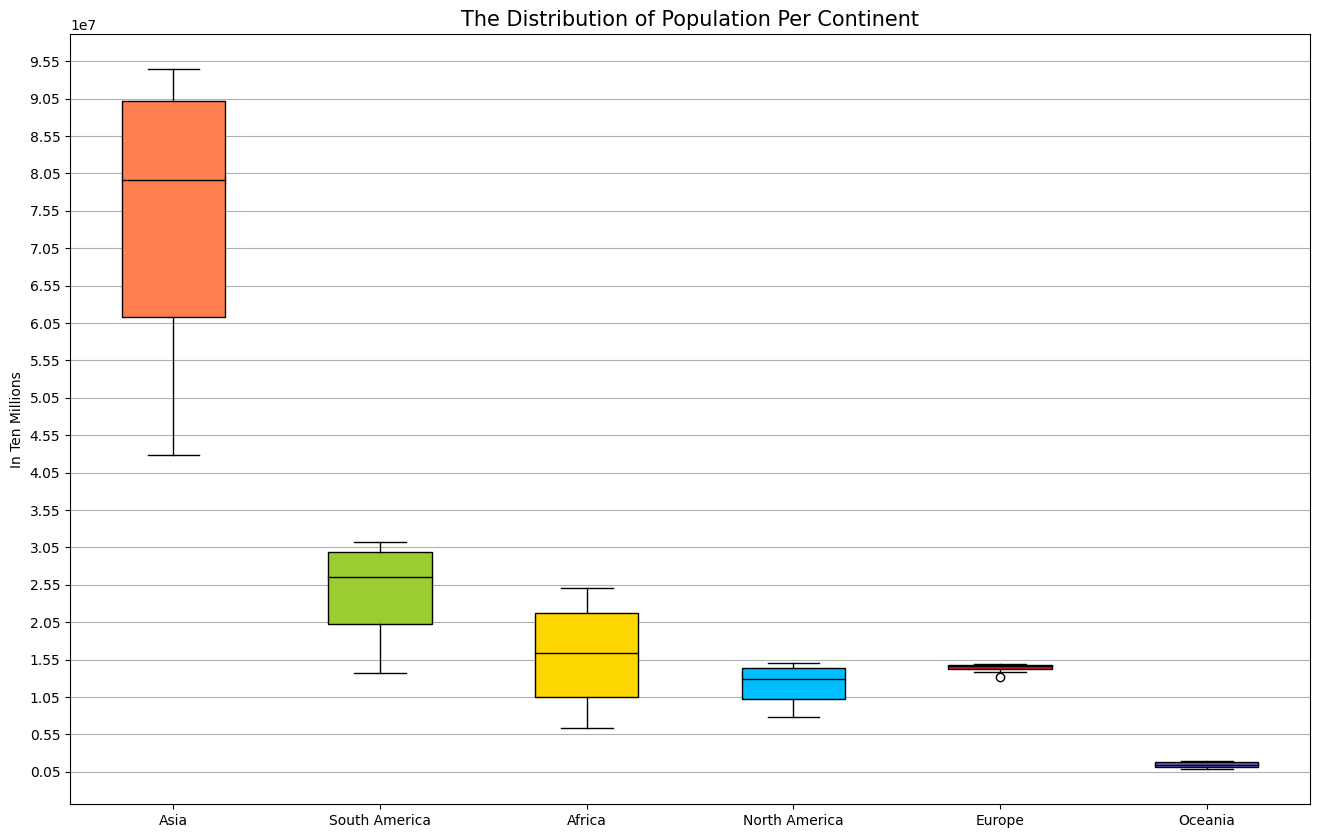

In [11]:
# he Distribution of Population Per Continent
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))

bplot = ax.boxplot(grouped_df1, vert=True, patch_artist=True, labels=grouped_df1.columns)  
ax.set_title("The Distribution of Population Per Continent", fontsize=15)

colors = ['coral','yellowgreen','gold','deepskyblue','crimson','slateblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set_color('black')

ax.yaxis.grid(True)
ax.set_ylabel("In Ten Millions")
ax.yaxis.set_ticks(np.arange(500000, 100000000, 5000000))

plt.show()

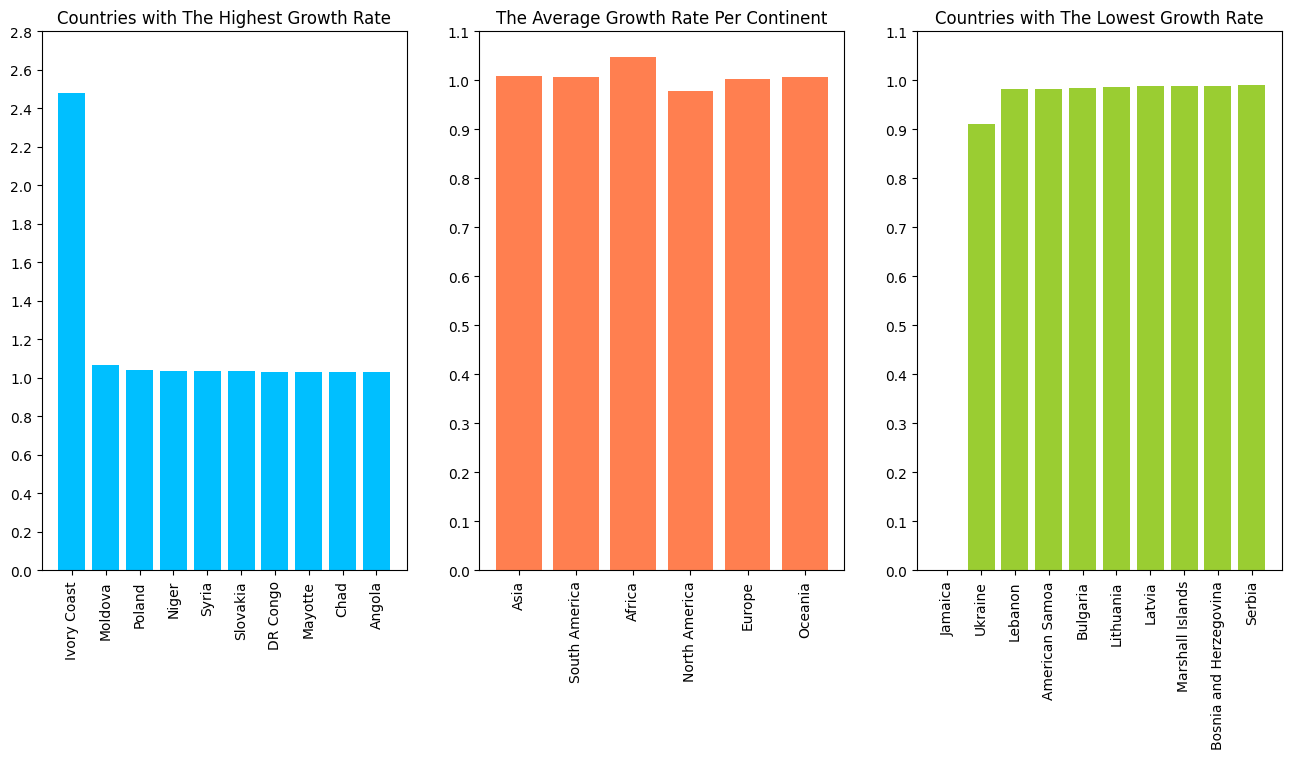

In [12]:
# The Average Growth Rate Per Continent
# Top 10 Countries with the Highest and the Lowest Growth Rate
grouped_df2 = df.groupby("Continent")[df.columns[13:]].mean(numeric_only=True).sort_values(by="World Population Percentage", ascending=False)

top_highest = df.sort_values(by="Growth Rate", ascending=False).head(10)
top_lowest = df.sort_values(by="Growth Rate").head(10)

fig, axs = plt.subplots(ncols=3, figsize=(16,7))
axs[0].bar(x=top_highest["Country"], height=top_highest["Growth Rate"], color = ['deepskyblue'])
axs[0].set_title("Countries with The Highest Growth Rate")
axs[0].yaxis.set_ticks(np.arange(0, 3, 0.2))

axs[1].bar(x=grouped_df2.index, height=grouped_df2["Growth Rate"], color = ['coral'])
axs[1].set_title("The Average Growth Rate Per Continent")
axs[1].yaxis.set_ticks(np.arange(0, 1.2, 0.1))

axs[2].bar(x=top_lowest["Country"], height=top_lowest["Growth Rate"], color = ['yellowgreen'])
axs[2].set_title("Countries with The Lowest Growth Rate")
axs[2].yaxis.set_ticks(np.arange(0, 1.2, 0.1))

for tick_0, tick_1 in zip(axs[0].get_xticklabels(), axs[2].get_xticklabels()):
    tick_0.set_rotation(90)
    tick_1.set_rotation(90)
for tick in axs[1].get_xticklabels():
    tick.set_rotation(90)
plt.show()

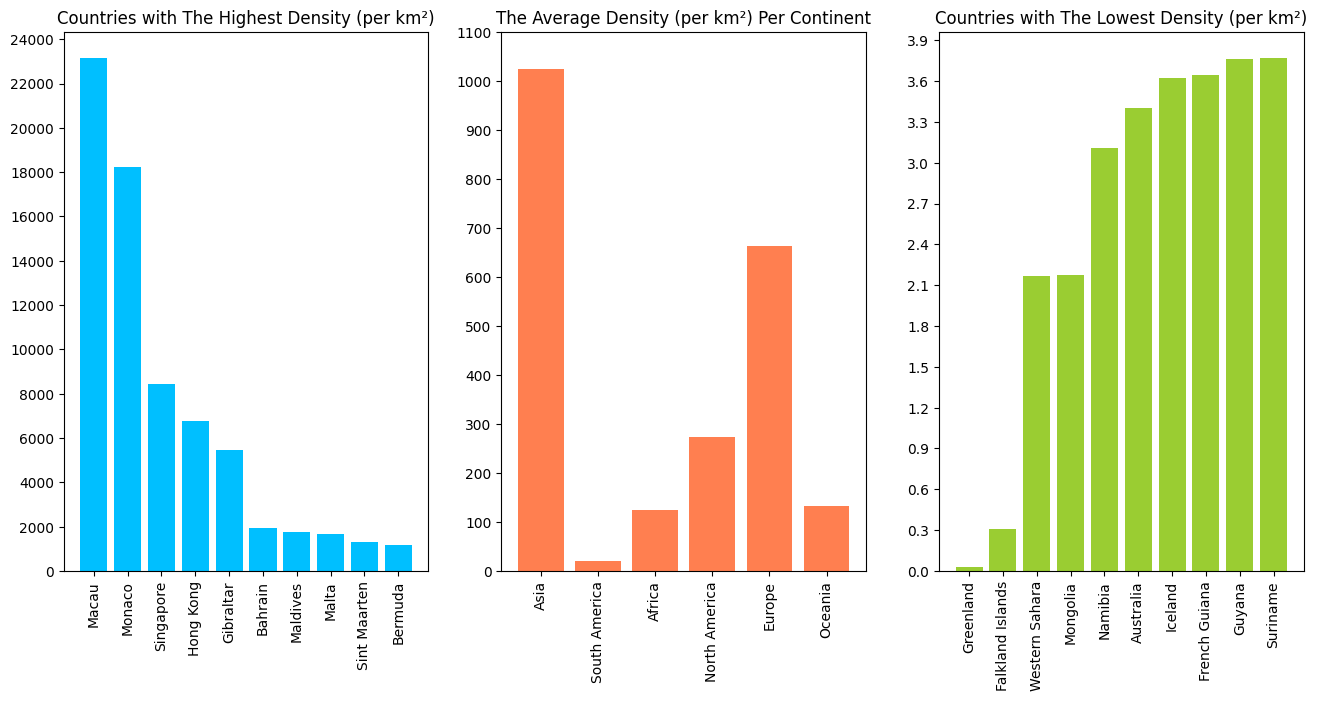

In [13]:
# The Average Density Per Continent
# Top 10 Countries with the Highest and the Lowest Density

top_highest = df.sort_values(by="Density (per km²)", ascending=False).head(10)
top_lowest = df.sort_values(by="Density (per km²)").head(10)

fig, axs = plt.subplots(ncols=3, figsize=(16,7))
axs[0].bar(x=top_highest["Country"], height=top_highest["Density (per km²)"], color = ['deepskyblue'])
axs[0].set_title("Countries with The Highest Density (per km²)")
axs[0].yaxis.set_ticks(np.arange(0, 24001, 2000))

axs[1].bar(x=grouped_df2.index, height=grouped_df2["Density (per km²)"], color = ['coral'])
axs[1].set_title("The Average Density (per km²) Per Continent")
axs[1].yaxis.set_ticks(np.arange(0, 1101, 100))

axs[2].bar(x=top_lowest["Country"], height=top_lowest["Density (per km²)"], color = ['yellowgreen'])
axs[2].set_title("Countries with The Lowest Density (per km²)")
axs[2].yaxis.set_ticks(np.arange(0, 4.1, 0.3))

for tick_0, tick_1 in zip(axs[0].get_xticklabels(), axs[2].get_xticklabels()):
    tick_0.set_rotation(90)
    tick_1.set_rotation(90)
for tick in axs[1].get_xticklabels():
    tick.set_rotation(90)
plt.show()

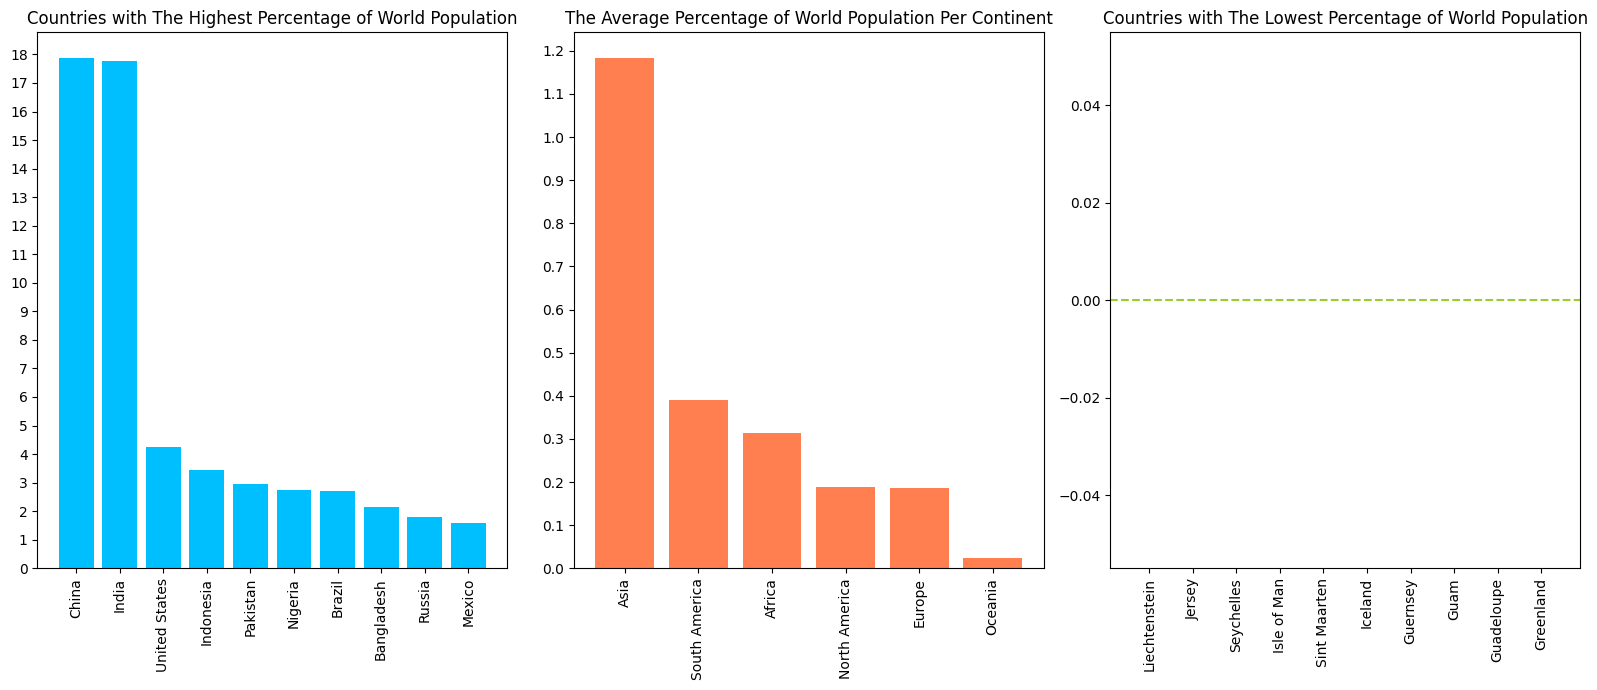

In [14]:
# The Average Percentage of World Population Per Continent
# Top 10 Countries with the Highest and the Lowest Percentage of World Population 

top_highest = df.sort_values(by="World Population Percentage", ascending=False).head(10)
top_lowest = df.sort_values(by="World Population Percentage").head(10)

fig, axs = plt.subplots(ncols=3, figsize=(16,7))
axs[0].bar(x=top_highest["Country"], height=top_highest["World Population Percentage"], color = ['deepskyblue'])
axs[0].set_title("Countries with The Highest Percentage of World Population")
axs[0].yaxis.set_ticks(np.arange(0, 19, 1))

axs[1].bar(x=grouped_df2.index, height=grouped_df2["World Population Percentage"], color = ['coral'])
axs[1].set_title("The Average Percentage of World Population Per Continent")
axs[1].yaxis.set_ticks(np.arange(0, 1.3, 0.1))

axs[2].bar(x=top_lowest["Country"], height=top_lowest["World Population Percentage"], color = ['yellowgreen'])
axs[2].set_title("Countries with The Lowest Percentage of World Population")
axs[2].axhline(y=top_lowest["World Population Percentage"].mean(), color='yellowgreen', linestyle='--') 

for tick_0, tick_1 in zip(axs[0].get_xticklabels(), axs[2].get_xticklabels()):
    tick_0.set_rotation(90)
    tick_1.set_rotation(90)
for tick in axs[1].get_xticklabels():
    tick.set_rotation(90)
    
plt.tight_layout()
plt.show()

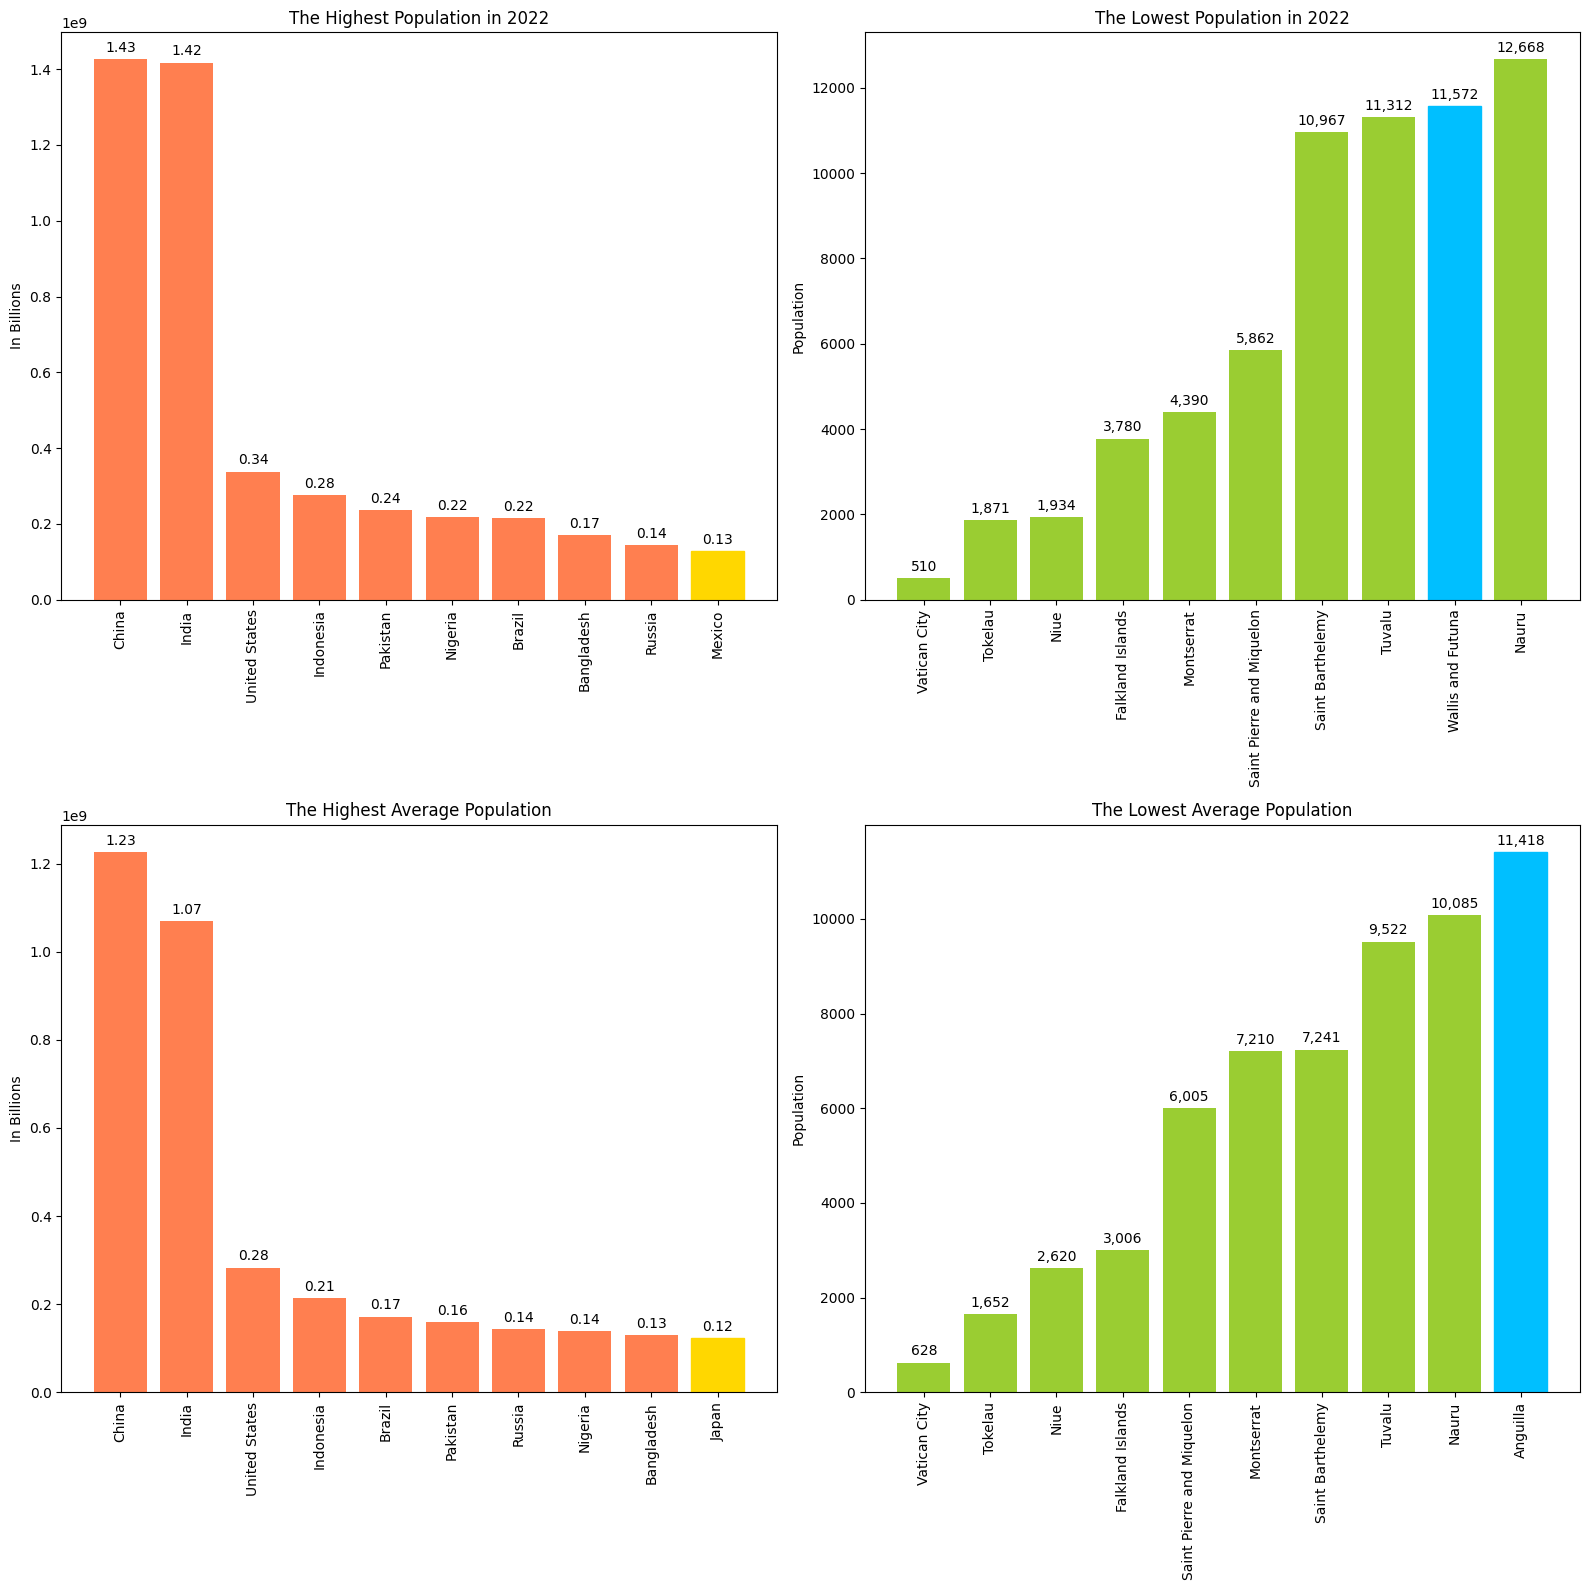

In [15]:
# Top 10 Countries with the Highest and the Lowest Population in 2022
# Top 10 Countries with The Highest and the Lowest Average Population

top_highest = df.sort_values(by="2022 Population", ascending=False).head(10)
top_lowest = df.sort_values(by="2022 Population").head(10)

highest_avg = df.groupby("Country")[df.columns[5:13]].mean(numeric_only=True).transpose().mean().sort_values(ascending=False).head(10)
lowest_avg = df.groupby("Country")[df.columns[5:13]].mean(numeric_only=True).transpose().mean().sort_values(ascending=True).head(10)

y_h = [f"{n/(10**9):,.2f}" for n in top_highest["2022 Population"].to_list()]
y_l = [f"{n:,.0f}" for n in top_lowest["2022 Population"].to_list()]
y_ah = [f"{n/(10**9):,.2f}" for n in highest_avg.to_list()]
y_al = [f"{n:,.0f}" for n in lowest_avg.to_list()]

xs = [0,0,1,1]
ys = [0,1,0,1]
x_data = [top_highest["Country"], top_lowest["Country"],highest_avg.index, lowest_avg.index]
y_data = [top_highest["2022 Population"], top_lowest["2022 Population"], highest_avg, lowest_avg]
colors = ["coral", "yellowgreen", "coral", "yellowgreen"]
y_labels = ["In Billions", "Population", "In Billions", "Population"]
titles = ["The Highest Population in 2022", "The Lowest Population in 2022", "The Highest Average Population", "The Lowest Average Population"]
bar_labels = [y_h, y_l, y_ah, y_al]
dif_idx = [9, 8, 9, 9]
dif_color = ["gold", "deepskyblue", "gold", "deepskyblue"]


fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16,16))

for  x, y, x_d, y_d, color, y_label, title, bar_label, idx, df_c in zip(xs, ys, x_data, y_data, colors, y_labels, titles, bar_labels, dif_idx, dif_color):
    bar_ch = axs[x,y].bar(x=x_d, height=y_d, color = [color])
    axs[x,y].set(ylabel=y_label, title=title)
    axs[x,y].bar_label(bar_ch, labels=bar_label, padding=3)
    bar_ch[idx].set_color(df_c)
    
    for tick in axs[x,y].get_xticklabels():
        tick.set_rotation(90)
    
fig.tight_layout()
plt.show()

- Apart from China, India, the United States, and Indonesia, there are several differences in the list of countries with the highest population in 2022 and the highest average population.
- There are also differences among the countries in the list with the lowest population in 2022 and the lowest average population.

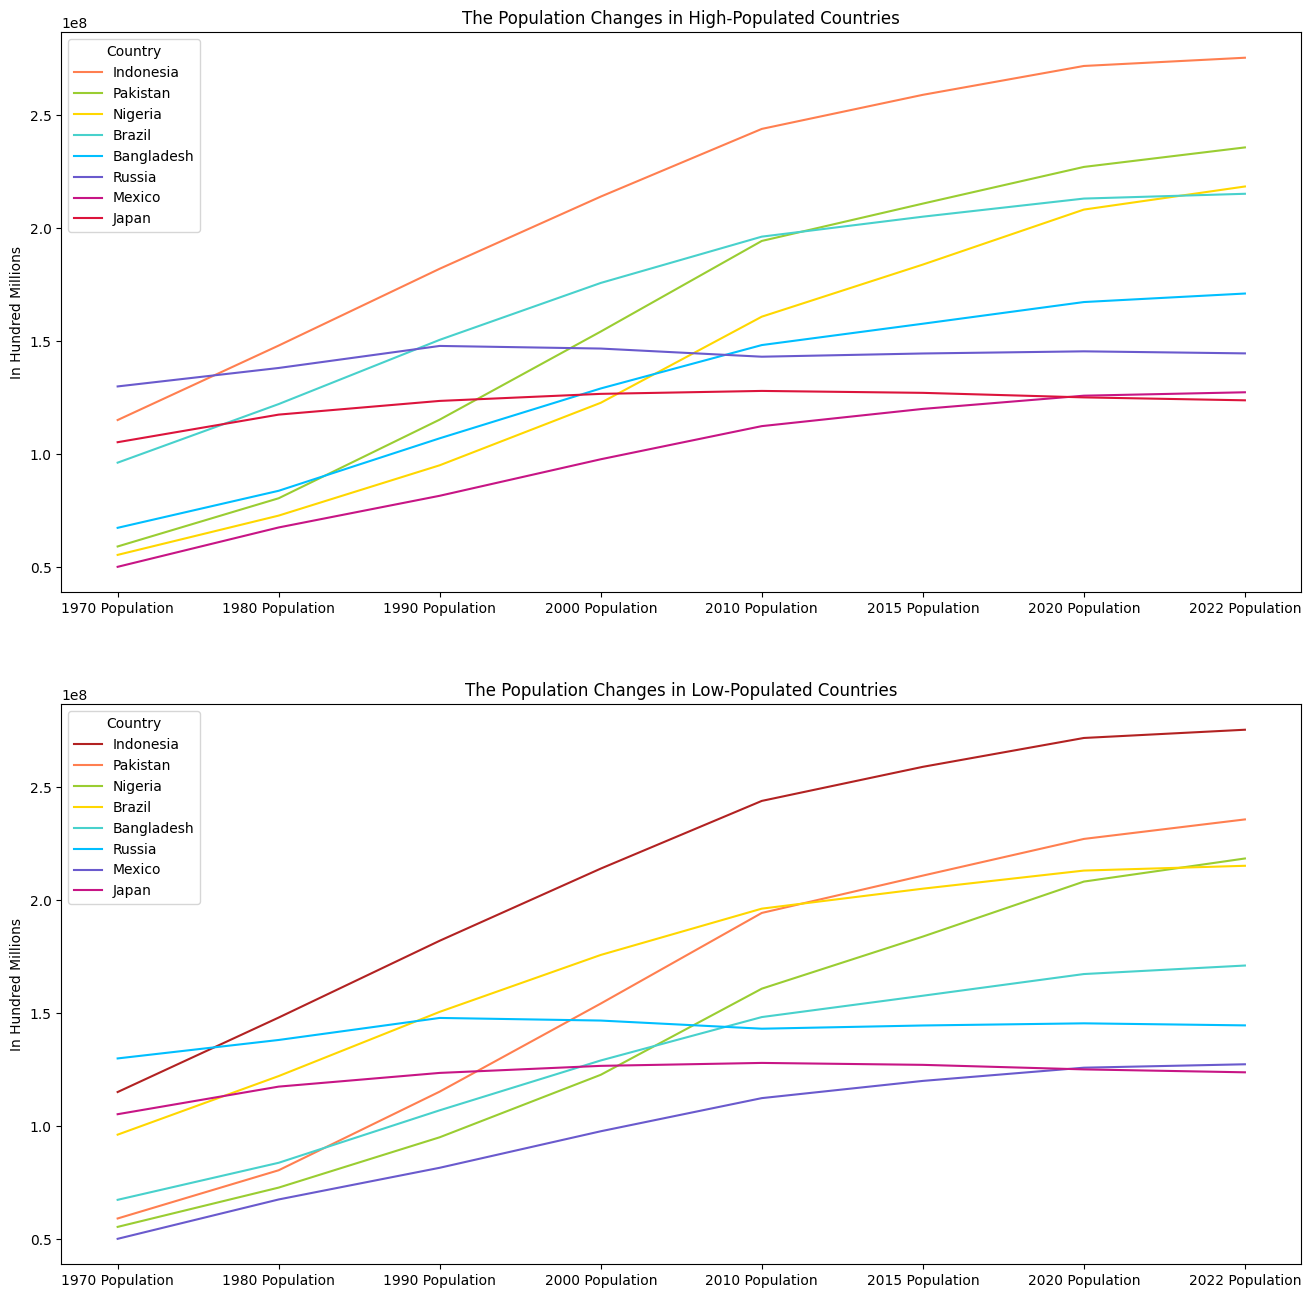

In [16]:
# The Population Changes in Highly Populated and Lowly Populated Countries

high_pop = top_highest["Country"].drop(index=[41,92,221]).to_list() + ["Japan"]
highest_group = df.groupby("Country")[list(reversed(df.columns[5:13].to_list()))].mean(numeric_only=True).loc[high_pop].transpose()

low_pop = top_lowest["Country"].drop(index=[226,209]).to_list()+["Anguilla"]
lowest_group = df.groupby("Country")[list(reversed(df.columns[5:13].to_list()))].mean(numeric_only=True).loc[low_pop].transpose()


fig, axs = plt.subplots(nrows=2, figsize=(16,16))

highest_group.plot(ax=axs[0], color=['coral','yellowgreen','gold','mediumturquoise','deepskyblue','slateblue','mediumvioletred','crimson'])
axs[0].set(ylabel="In Hundred Millions", title="The Population Changes in High-Populated Countries")

highest_group.plot(ax=axs[1], color=['firebrick','coral','yellowgreen','gold','mediumturquoise','deepskyblue','slateblue','mediumvioletred','crimson'])
axs[1].set(ylabel="In Hundred Millions", title="The Population Changes in Low-Populated Countries")

plt.show()